# 1. Работа с ОС.

## 1.1. Создайте папки в /usr/local

```
cd /usr/local
sudo mkdir folder_max, folder_min
```

## 1.2. Создайте две группы пользователей

```
sudo groupadd group_max
sudo groupadd group_min
```

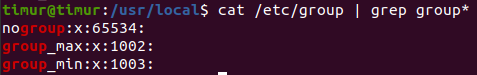

## 1.3. Создать двух пользователей, установим для них пароли.

```
sudo useradd user_max
sudo passwd user_max ...
sudo useradd user_min
sudo passwd user_min ...
```
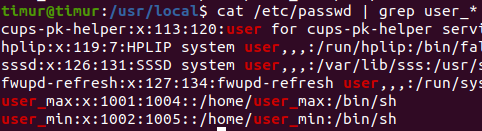

## 1.4. Для пользователей из группы group_max дать полный доступ на директории folder_max и folder_min. Для пользователей группы group_min дать полный доступ только на директорию folder_min

Добавим пользователей в соответствующие группы:
```
sudo usermod -g group_max user_max
sudo usermod -g group_min user_min
```

И заранее добавим пользователя user_min в группу group_max.
```
sudo usermod -aG group_max user_min
```
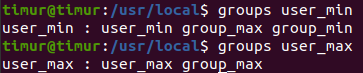

Теперь выдаем права:

```
sudo setfacl -m g:group_max:rwx folder_max
```

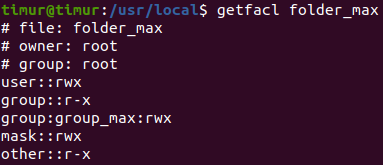
```
sudo setfacl -m g:group_max:rwx folder_min
sudo setfacl -m g:group_min:rwx folder_min
```
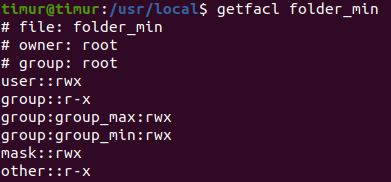

## 1.5. Создать и исполнить (пользователем из той же категории) скрипт в директории folder_max, который пишет текущую дату/время в файл output.log в текущей директории ???

Создаем файл для записи скрипта:
```
su user_max -c 'nano ./folder_max/script1.sh'
```

В скрипт пишем:

```
#!/bin/bash
date > ./output.log
```

Запускаем скрипт

```
su user_max -c 'bash ./folder_max/script1.sh'

```

![image.png](attachment:image.png)

## 1.6. Создать и исполнить (пользователем из той же категории) скрипт в директории folder_max, который пишет текущую дату/время в файл output.log в директории folder_min

```
su user_max -c 'nano ./folder_max/script2.sh'
```

В файл записываем:

```
#!bin/bash

date > ./folder_min/output.log
```

Запускаем скрипт:
```
su user_max -c 'bash ./folder_max/script2.sh'
```

![image-2.png](attachment:image-2.png)

## 1.7. Исполнить (пользователем user_min) скрипт в директории folder_max, который пишет текущую дату/время в файл output.log в директории folder_min???

Для того, чтоб пользователем user_min можно было исполнить файл в директории folder_max, мы добавили пользователя user_min в группу group_max, потому что иначе мы не сможем исполнить скрипт.

Запускаем скрипт:
```
su user_min -c 'bash ./folder_max/script2.sh'
```

![image.png](attachment:image.png)


## 1.8. Создать и исполнить (пользователем из той же категории) скрипт в директории folder_min, который пишет текущую дату/время в файл output.log в директории folder_max

```
su user_max -c 'nano ./folder_min/script3.sh'
```

В файл записываем:

```
#!bin/bash

date > ./folder_max/output.log
```

Запускаем скрипт:

```
su user_max -c 'bash ./folder_min/script3.sh'
```

![image.png](attachment:image.png)


# 2. Docker

## Скопируем все наши скрипты в папку ~/docker, и продолжим работу в ней.

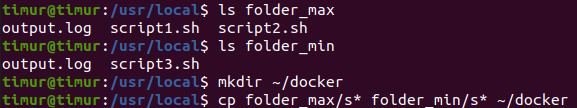


## 2.1. Создать скрипт, который пишет текущую дату/время в файл output.log в текущей директории.

```
nano script4.sh

```

В файл записываем:
```
#!/bin/bash

date > ./output.log
```

![image.png](attachment:image.png)

## 2.2. Собрать образ со скриптами выше и с пакетом nano

Для этого создадим Dockerfile со следующим содержанием:

![image.png](attachment:image.png)


Выполним сборку:
```
docker build -t myimage .
```

## 2.3. Запустим образ.

```
docker run myimage
```

Просмотреть, что образ запустился, можно командой 
```
docker ps -a
```
![image.png](attachment:image.png)

## 2.4. Запуск скрипта ***script4.sh***

Для выполнения скрипта запустим контейнер в интерактивном режиме командой:
```
docker run -it myimage /bin/bash
```

![image.png](attachment:image.png)

## 2.5. Вывести список пользователей в собранном образе.

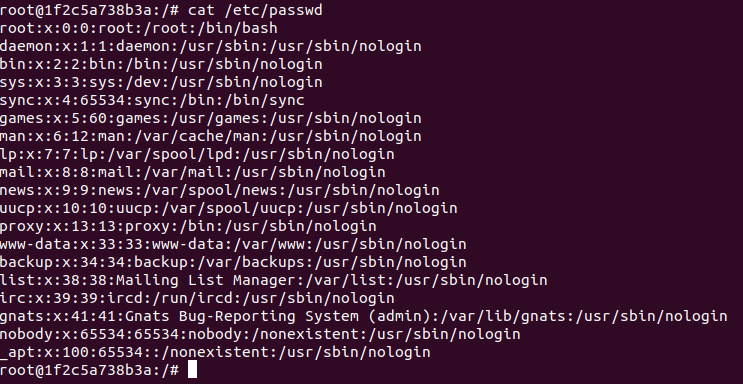

# 3. Git

## 1, 2. Через сайт сделал репозиторий: https://github.com/bitxzibit3/ITMO23_UNIX, создал структуру репозитория локально.

## 3 .Для добавления веток локально использовал команду:
```
git branch <name>
```
![image.png](attachment:image.png)

## Для добавления веток удаленно использовал:
```
git push origin <branch_name>
```
![image-2.png](attachment:image-2.png)
![image-4.png](attachment:image-4.png)

## Для удаления ветки локально использовал:
```
git checkout dev # Переключение на другую ветку
git branch -D main
```
## Для удаления ветки удаленно использовал:
```
git push origin -d main
```
![image-11.png](attachment:image-11.png)
## Предварительно поменял дефолтную ветку на удаленном репозитории.

## 4. Скрипт переноса ревизии с dev в stg:
![image-10.png](attachment:image-10.png)
## 5. Скрипт переноса ревизии с std в prd:
![image-9.png](attachment:image-9.png)
